In [ ]:
## New notebook to carry out some of the trickier analysis on binned intensity ##
# GOAL: Would like to find a mean intensity at each box as well as a standard deviation
# Will agglomerate all points within a given range (currently 15-days and 2 degrees) and spit out an answer.

#the end vision is to have a 3-panel plot with decadal frequency change, intensity chance and f*i change
#effectively, to give a causality to changes in banded rainfall already observed in the banded rainfall plot.

In [48]:
import numpy as np
import time
import os
import netCDF4 as nc
import datetime
import matplotlib.pyplot as plt
#import masked arrays - important because intensity shows up as a NaN at some points
import numpy.ma as ma
%matplotlib notebook

In [5]:
## LOAD FROM NETCDF FILE ##
savefile = "RDA_int_hov"
ferretpath = "/Users/Siwen/Desktop/Ferret/bin/"

#netCDF output file formatting formatting
hovname = ferretpath + savefile + ".nc"
hovnc = nc.Dataset(hovname, "r")

#populate lists with intensity occupancy plots for each different time period (periods given below)
yr_beg = [1951,1951,1980,1980,1994]
yr_end = [2007,1979,2007,1993,2007]

#initialize intensity occupancy matrix storage
ints_1_hov = []
ints_2_hov = []
ints_hov = []

for yr_b, yr_e in zip(yr_beg, yr_end):

    years = str(yr_b-1900) + str("{0:0=2d}".format((yr_e-1900)%100))
    print(years)
    
    ints_1_hov.append(hovnc['int_1_hov_' + years][:])
    ints_2_hov.append(hovnc['int_2_hov_' + years][:])
    ints_hov.append(hovnc['int_hov_' + years][:])
    
hovnc.close()

5107
5179
8007
8093
9407


In [12]:
##collect function designed to aggregate all observations from 3D storage matrix - takes every ensemble (3rd dimension)
#then selections range of days and latitude range (I've mostly been using 15 day and 2 degree-latitude smoothing)

#RETURNS every non-NaN observation, as a single numpy array
#inputs: P is the full 3D matrix, dd is the day of interest(0-364), yy is the latitude bin of interest (likely 0-21)
def collect(P,dd,latbin,dayrange,latrange):
        
    ll=int((dayrange-1)/2)
    yy=int((latrange-1)/2)
    
    days = P.shape[0]
    lats = P.shape[1]
    
    Psample = P.take(range(dd-ll,dd+ll+1), mode='wrap', axis=0)
    P_collect = Psample[:,max(0,latbin-yy):min(days,latbin+yy+1),:].flatten()
    P_return = P_collect[~np.isnan(P_collect)]
    #print(len(P_collect))
    #print(len(P_return))
    
    return P_collect[~np.isnan(P_collect)]

In [13]:
collect(ints_hov[0], 300, 4, 15, 5)

array([ 23.36726996,  17.76521089,  20.45413306,  29.1540499 ,
        18.05255094,  11.0834208 ,  12.62752399,  16.43928646,
        57.72936945,  39.4053327 ,  20.56310143,  31.1156937 ,
        49.09804515,  40.05472993,  29.04730072,  24.6422515 ,
        22.24748301,  34.63161446,  12.15921136,  17.38620831,
        26.39094446,  15.07890138,  15.94646255,  29.93557753,
        11.04294947,  20.33773751,  45.10287412,  27.77153342,
        20.61953535,  15.3016004 ,  26.50325706,  12.89271385,
        22.06989196,  16.87793584,  16.46374964,  16.12566854,
        23.56461492,  19.21219114,  14.01786869,  20.0609555 ])

In [58]:
## for each day and each latitude bin, use collect to find the intensity of all events in range, then find mean
#and standard deviation.
#unfortunately, can't just one-shot it (must go cell-by-cell) because cannot predict the length of the output from collect

ints_1_hov_mean = []
ints_2_hov_mean = []
ints_hov_mean = []

ints_1_hov_std = []
ints_2_hov_std = []
ints_hov_std = []

dayrange = 15
latrange = 5

for ints_1, ints_2, ints in zip(ints_1_hov, ints_2_hov, ints_hov):
    
    #initialize temporary results storage
    ints_1_mean = np.zeros([365,22])
    ints_2_mean = np.zeros([365,22])
    ints_mean = np.zeros([365,22])
    
    ints_1_std = np.zeros([365,22])
    ints_2_std = np.zeros([365,22])
    ints_std = np.zeros([365,22])
    
    for dd in range(365):
        for jj in range(22):
            intcol_1 = collect(ints_1, dd, jj, dayrange, latrange)
            ints_1_mean[dd,jj] = np.mean(intcol_1)
            ints_1_std[dd,jj] = np.std(intcol_1)
            
            intcol_2 = collect(ints_2, dd, jj, dayrange, latrange)
            ints_2_mean[dd,jj] = np.mean(intcol_2)
            ints_2_std[dd,jj] = np.std(intcol_2)
            
            intcol = collect(ints, dd, jj, dayrange, latrange)
            ints_mean[dd,jj] = np.mean(intcol)
            ints_std[dd,jj] = np.std(intcol)
            
    #append to permanent results storage            
    ints_1_hov_mean.append(ints_1_mean)
    ints_2_hov_mean.append(ints_2_mean)
    ints_hov_mean.append(ints_mean)
    
    ints_1_hov_std.append(ints_1_std)
    ints_2_hov_std.append(ints_2_std)
    ints_hov_std.append(ints_std)



//anaconda/lib/python3.5/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
//anaconda/lib/python3.5/site-packages/numpy/core/_methods.py:70: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
//anaconda/lib/python3.5/site-packages/numpy/core/_methods.py:82: RuntimeWarning: Degrees of freedom <= 0 for slice
  warnings.warn("Degrees of freedom <= 0 for slice", RuntimeWarning)
//anaconda/lib/python3.5/site-packages/numpy/core/_methods.py:94: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
//anaconda/lib/python3.5/site-packages/numpy/core/_methods.py:116: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
//anaconda/lib/python3.5/site-packages/numpy/ma/core.py:4089: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warnin

In [59]:
## Create masked arrays - allows for plotting even though there are some NaN elements
#magic! automatically applies to all 5 elements of the original
ints_1_mean_mask = ma.array(ints_1_hov_mean, mask = np.isnan(ints_1_hov_mean))
ints_2_mean_mask = ma.array(ints_2_hov_mean, mask = np.isnan(ints_2_hov_mean))
ints_mean_mask = ma.array(ints_hov_mean, mask = np.isnan(ints_hov_mean))

ints_1_std_mask = ma.array(ints_1_hov_std, mask = np.isnan(ints_1_hov_std))
ints_2_std_mask = ma.array(ints_2_hov_std, mask = np.isnan(ints_2_hov_std))
ints_std_mask = ma.array(ints_hov_std, mask = np.isnan(ints_hov_std))

In [63]:
print(ints_2_mean_mask[0][:,10])

[-- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- 11.189996229635703
 11.189996229635703 11.189996229635703 11.189996229635703
 11.189996229635703 11.189996229635703 11.189996229635703
 11.189996229635703 11.189996229635703 11.189996229635703
 11.189996229635703 11.189996229635703 11.189996229635703
 11.189996229635703 11.189996229635703 -- -- -- -- -- -- -- -- -- -- -- --
 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
 17.503152260413536 17.503152260413536 17.503152260413536
 17.503152260413536 17.503152260413536 17.503152260413536
 17.503152260413536 17.503152260413536 17.503152260413536
 17.503152260413536 17.503152260413536 17.503152260413536
 17.503152260413536 17.503152260413536 17.503152260413536 -- -- -- -- -- --
 -- -- -- -- -- -- 19.92071046412937 19.92071046412937 19.92071046412937
 19.92071046412937 19.92071046412937 19.92071046412937 19.92071046412937
 19.92071046412937 18.776922592284187 18.776922592284187 18.776922592284187
 18.776922592284187 18.77692259

<IPython.core.display.Javascript object>


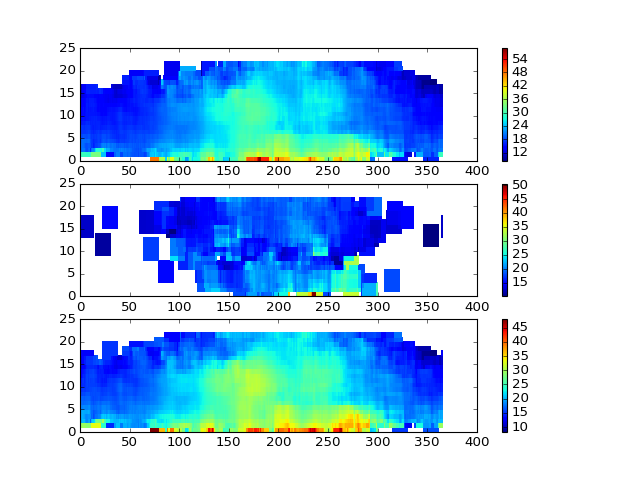

In [68]:
fig = plt.figure()
ax1 = fig.add_subplot(311)
plt.pcolormesh(ints_1_mean_mask[0].T)
plt.colorbar()

ax2= fig.add_subplot(312)
plt.pcolormesh(ints_2_mean_mask[0].T)
plt.colorbar()

ax3 = fig.add_subplot(313)
plt.pcolormesh(ints_mean_mask[0].T)
plt.colorbar()

In [10]:
aa = [5, 4, 3, 5, 5, 6, 7, 4]
print(np.std(aa))

1.16592238164


In [41]:
np.std([100])

0.0